# **TikTok Claim Classification Project EDA**

### **Task 1. Imports, links, and loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

### **Task 2: Data exploration and cleaning**

In [3]:
# Display and examine the first few rows of the dataframe
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get the size of the data
data.size

232584

In [5]:
# Get the shape of the data
data.shape

(19382, 12)

In [6]:
# Get basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
# Generate a table of descriptive statistics
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


### **Task 3. Build visualizations**

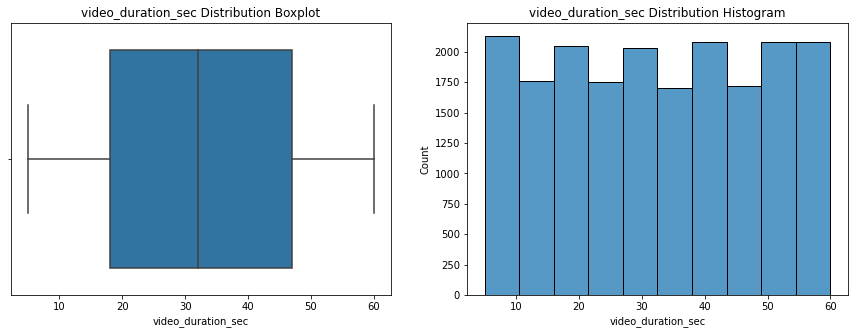

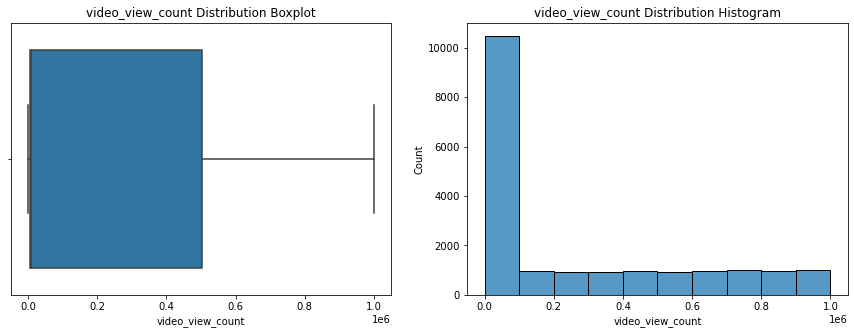

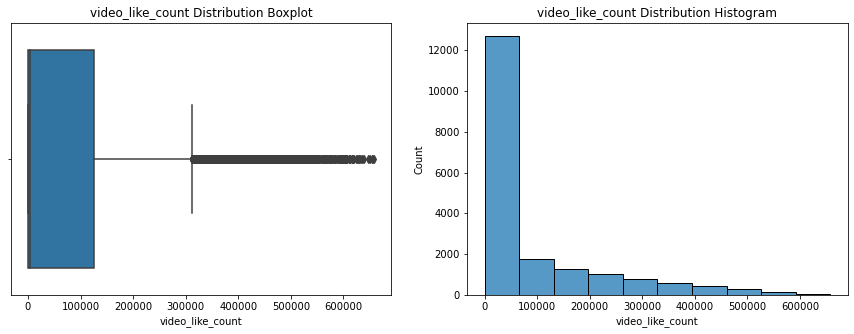

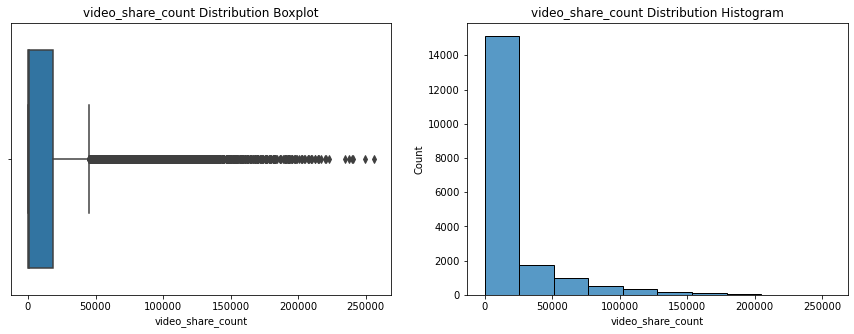

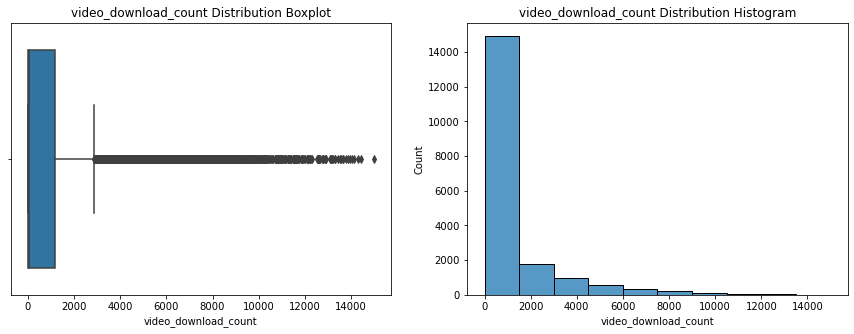

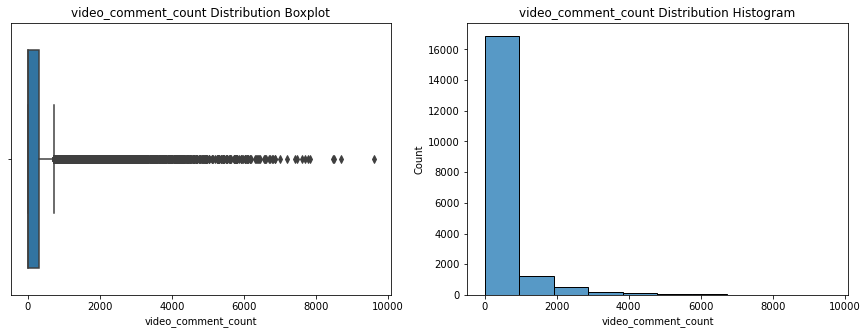

In [12]:
def plot_boxplots_and_histograms(dataframe, numeric_columns):
    # Loop through each numeric column in the list.
    for column in numeric_columns:
        # Create a subplot with two side-by-side axes to plot the boxplot and histogram.
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))

        # Boxplot: visualize the distribution of the column using a boxplot.
        sns.boxplot(dataframe[column], ax=ax[0])
        ax[0].set_title(f"{column} Distribution Boxplot")

        # Histogram: visualize the distribution of the column using a histogram with 10 bins.
        sns.histplot(dataframe[column], bins=10, ax=ax[1])
        ax[1].set_title(f"{column} Distribution Histogram")
        plt.show()

# List of numeric columns to be plotted.
numeric_columns = ['video_duration_sec', 'video_view_count', 'video_like_count', 'video_share_count',
                   'video_download_count', 'video_comment_count']

# Call the function to plot boxplots and histograms for the specified columns in the 'data' DataFrame.
plot_boxplots_and_histograms(data, numeric_columns)

#### **Claim status by verification status**

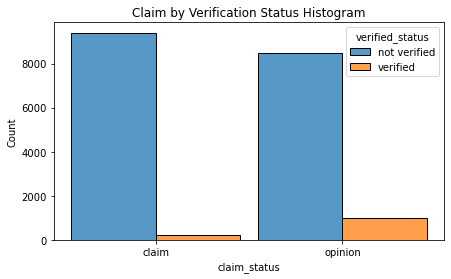

In [29]:
# Create a histogram with dodge-style bars to compare 'claim_status' based on 'verified_status'.
plt.figure(figsize=(7, 4))
sns.histplot(x=data["claim_status"], hue=data["verified_status"], multiple="dodge", shrink=0.9)
plt.title("Claim by Verification Status Histogram")
plt.show()

#### **Claim status by author ban status**

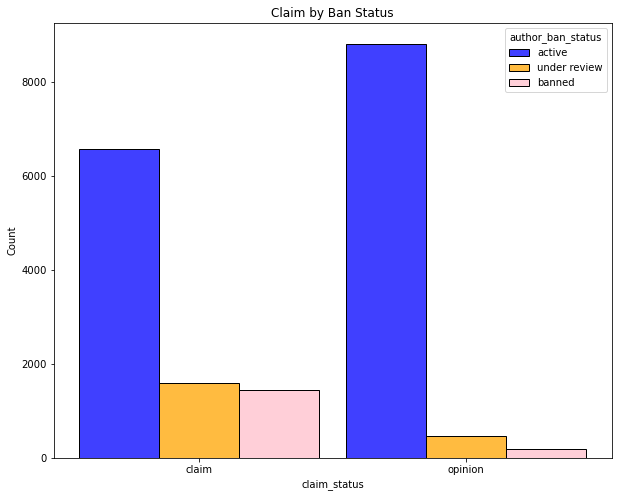

In [21]:
# Create a histogram with dodge-style bars to compare 'claim_status' based on 'author_ban_status'.
plt.figure(figsize=(10,8))

# 'order' and 'palette' are optional arguments to customize the order and color palette of the bars.
order=["active", "under review", "banned"]
color_palette={"active":"blue", "under review":"orange", "banned":"pink"}
sns.histplot(data=data, x="claim_status", hue="author_ban_status", multiple="dodge", hue_order=order, palette=color_palette, shrink=0.9)
plt.title("Claim by Ban Status")
plt.show()

#### **Median view counts by ban status**

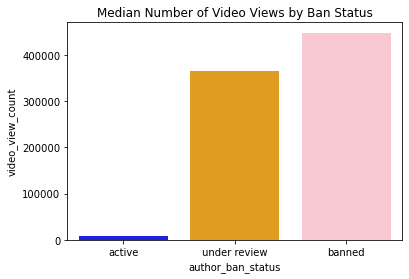

In [22]:
# Create a bar plot to visualize the median number of video views based on 'author_ban_status'.

# Calculate the median values for numeric columns grouped by 'author_ban_status'.
ban_status_median = data.groupby(['author_ban_status']).median(numeric_only=True).reset_index()

# 'x' represents the categorical variable 'author_ban_status', 'y' represents the numeric variable 'video_view_count'.
sns.barplot(data=ban_status_median, x="author_ban_status", y="video_view_count", order=order, palette=color_palette)

# Set the title for the bar plot.
plt.title("Median Number of Video Views by Ban Status")

# Display the plot.
plt.show()

#### **Total views by claim status**

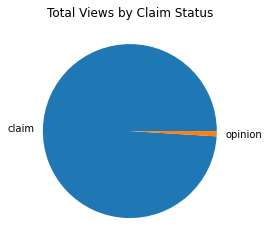

In [25]:
# Create a pie graph
plt.pie(data.groupby("claim_status")["video_view_count"].sum(), labels=["claim", "opinion"])
plt.title("Total Views by Claim Status")
plt.show()

#### **User Interaction by claim_status**

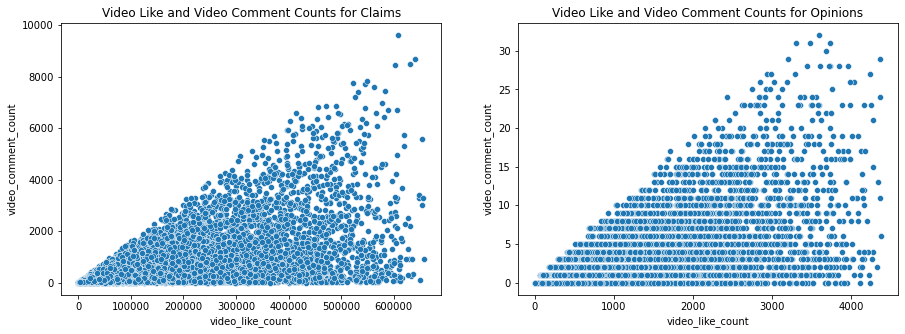

In [30]:
# Create a scatterplot of `video_like_count` versus `video_comment_count` according to 'claim_status'.

# Define the two claim status categories: claim and opinion.
cl_op = ["claim", "opinion"]

# Create subplots with two side-by-side axes to plot the scatterplots.
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Loop through each claim status category.
x = 0
for i in cl_op:
    # Filter the data for the current claim status category.
    data_1 = data[data["claim_status"] == i]
    
    # Create the scatterplot using seaborn's scatterplot function.
    sns.scatterplot(x=data_1["video_like_count"], y=data_1["video_comment_count"], ax=ax[x])
    
    # Set the title for the scatterplot with the corresponding claim status category.
    ax[x].set_title("Video Like and Video Comment Counts for " + i.capitalize() + "s")
    
    # Increment the subplot index.
    x += 1

plt.show()

### **Task 4. Determine outliers**

In [26]:
# Define a list of column names to analyze for outliers.
col_names = ['video_view_count',
             'video_like_count',
             'video_share_count',
             'video_download_count',
             'video_comment_count']

# Loop through each column in the list to detect outliers using the IQR method.
for column in col_names:
    # Calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR) for the column.
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate the median value for the column.
    median = data[column].median()
    
    # Define the threshold for identifying outliers (1.5 times the IQR above the third quartile).
    outlier = median + 1.5 * iqr
    
    # Count the number of outliers in the column (values greater than the outlier threshold).
    outlier_num = data[data[column] > outlier].shape[0]
    
    # Print the number of outliers for the current column.
    print(f"Number of outliers, {column}: {outlier_num}")

Number of outliers, video_view_count 2343
Number of outliers, video_like_count 3468
Number of outliers, video_share_count 3732
Number of outliers, video_download_count 3733
Number of outliers, video_comment_count 3882


### **Task 5. Conclusion**

•	Exploratory data analysis (EDA) delves into the impact of videos on TikTok users, focusing on engagement metrics like view, like, and comment counts. Key insights from EDA highlight the need to address null values and the imbalance in opinion video counts within the future classification model.

•	Verified users are significantly outnumbered by unverified users, but when a user is verified, they are more inclined to post opinion videos.

•	Both claim and opinion videos have a higher number of active authors compared to banned or authors under review. However, the proportion of active authors is notably higher for opinion videos than for claim videos, indicating that authors posting claim videos are more likely to come under review or be banned.

•	Non-active authors have a substantially higher median view count than active authors. Considering that non-active authors are more likely to post claim videos, and their videos receive more views overall than videos by active authors, the video_view_count could be a valuable indicator of claim status.

•	Although the dataset contains a roughly equal number of each video type, claim videos dominate the overall view count.

•	Given the dataset's size of approximately 20,000 entries, it's important to note that there are a considerable number of outliers in different columns, ranging between around 2,400 and 3,900. These outliers should be carefully considered when selecting and constructing the machine learning model.

•	The EDA reveals crucial aspects to be addressed in the claim classification model, including handling null values and acknowledging data distribution characteristics. By incorporating these insights, we will build an accurate and effective machine learning model for TikTok's claim classification.